##POS Tagging in NLP using Spacy

In [26]:
import pandas as pd

text = ['The majestic mountains towered over the picturesque valley, covered in a blanket of fresh snow.',
      'I am feeling ecstatic about the upcoming vacation; the anticipation is overwhelming.',
      'In the heart of New York City, Times Square buzzes with energy and vibrant lights.']

df = pd.DataFrame(text, columns=['Sentence'])

df

,Sentence
0,The majestic mountains towered over the pictur...
1,I am feeling ecstatic about the upcoming vacat...
2,"In the heart of New York City, Times Square bu..."


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

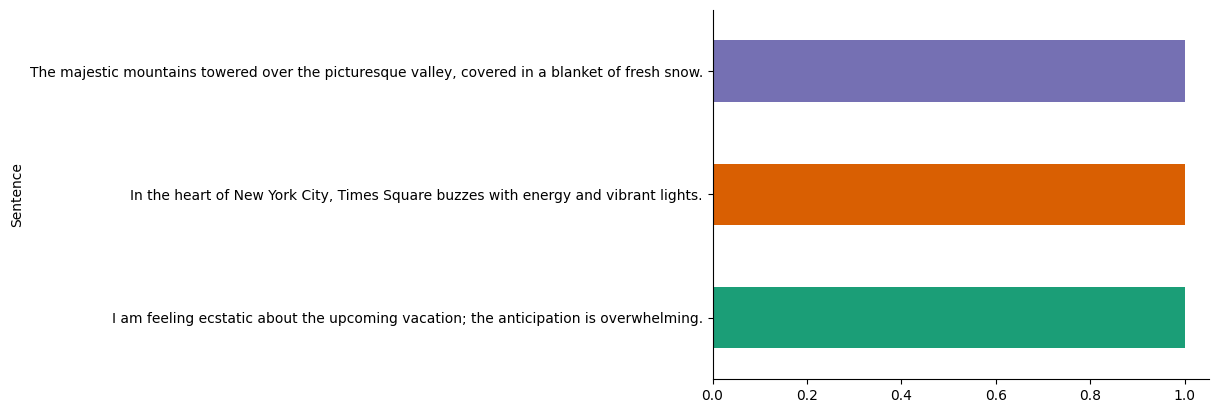

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
import spacy

#load the small English model
nlp = spacy.load("en_core_web_sm")

#list to store the tokens and pos tags
token = []
pos = []

for sent in nlp.pipe(df['Sentence']):
    if sent.has_annotation('DEP'):
        #add the tokens present in the sentence to the token list
        token.append([word.text for word in sent])
        #add the pos tage for each token to the pos list
        pos.append([word.pos_ for word in sent])
df['token'] = token
df['pos'] = pos

In [29]:
# counting the number of a specific pos tag in each sentence
# (in the 'pos' col) and adding a new col for it in the df
df['noun'] = df.apply(lambda x: x['pos'].count('NOUN'), axis=1)
df['verb'] = df.apply(lambda x: x['pos'].count('VERB'), axis=1)
df['adj'] = df.apply(lambda x: x['pos'].count('ADJ'), axis=1)
df['punct'] = df.apply(lambda x: x['pos'].count('PUNCT'), axis=1)

df

,Sentence,token,pos,noun,verb,adj,punct
0,The majestic mountains towered over the pictur...,"[The, majestic, mountains, towered, over, the,...","[DET, ADJ, NOUN, VERB, ADP, DET, ADJ, NOUN, PU...",4,2,3,2
1,I am feeling ecstatic about the upcoming vacat...,"[I, am, feeling, ecstatic, about, the, upcomin...","[PRON, AUX, VERB, ADJ, ADP, DET, ADJ, NOUN, PU...",2,1,3,2
2,"In the heart of New York City, Times Square bu...","[In, the, heart, of, New, York, City, ,, Times...","[ADP, DET, NOUN, ADP, PROPN, PROPN, PROPN, PUN...",3,1,1,2
